In [1]:
%matplotlib inline

In [2]:
import fftw3
import pyfftw
import numpy as np

In [3]:
x = np.ones([64,64], dtype='float64')
y = np.empty([64,64], dtype='float64')

In [48]:
fft_forward = fftw3.Plan(x.astype('complex'), y, direction='forward',
                        nthreads=1)
%timeit fft_forward.execute()

100000 loops, best of 3: 19.7 µs per loop


In [13]:
%timeit np.fft.fft2(x)

10000 loops, best of 3: 120 µs per loop


In [53]:
import timeit
setup_fftw = ("import numpy as np; import fftw3; x=np.ones([{size},{size}]); y=np.empty([{size},{size}]);"
              "fft_forward = fftw3.Plan(x.astype('complex'), y, direction='forward',"
              "nthreads=1)")
setup_npfft = ("import numpy as np; x=np.ones([{size},{size}]);")
setup_pyfftw_interface = "import numpy as np; import pyfftw; x=np.ones([{size},{size}]);"

In [41]:
sizes = range(5,129)

In [42]:
times_fftw = np.array([timeit.repeat("fft_forward.execute()", setup=setup_fftw.format(size=size), repeat=3, number=100)
              for size in sizes]).mean(axis=1)

In [54]:
times_pyfftw_interface = np.array([timeit.repeat("pyfftw.interfaces.numpy_fft.fft2(x)", setup=setup_pyfftw_interface.format(size=size), repeat=3, number=100)
              for size in sizes]).mean(axis=1)

In [43]:
times_npfft = np.array([timeit.repeat("np.fft.fft2(x)", setup=setup_npfft.format(size=size), repeat=3, number=100)
               for size in sizes]).mean(axis=1)

In [44]:
import pylab as pl

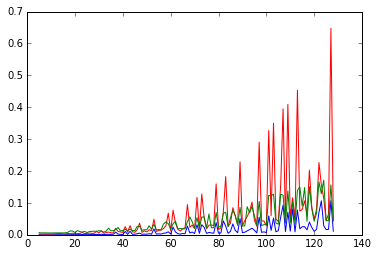

In [56]:
pl.plot(sizes, times_fftw, color='b')
pl.plot(sizes, times_npfft, color='r')
pl.plot(sizes, times_pyfftw_interface, color='g')

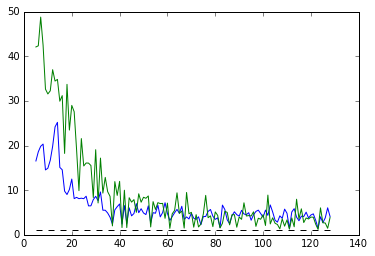

In [58]:
pl.plot(sizes, times_npfft/times_fftw, color='b')
pl.plot(sizes, times_pyfftw_interface/times_fftw, color='g')
pl.plot(sizes, np.ones(len(sizes)), 'k--')